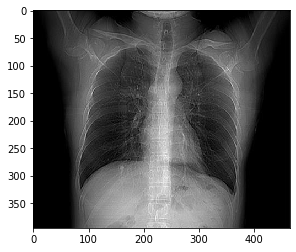

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_dir = "/home/hemant/Desktop/covid-chestxray-dataset/dataset/"
categories = ["covid19","normal"]

for category in categories:
    path = os.path.join(data_dir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

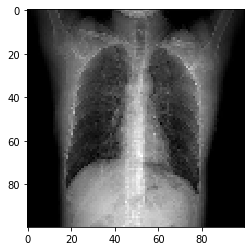

In [26]:
#print(img_array.shape)
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [27]:
training_data = []


#0 = covid, 1 = normal
def create_training_data():
    for category in categories:
        path = os.path.join(data_dir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
            #plt.imshow(img_array,cmap="gray")
            #plt.show()

create_training_data()

In [28]:
print(len(training_data))

339


In [29]:
import random
random.shuffle(training_data)

In [30]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
0
0
1
1
1


In [31]:
X = []
Y = []


In [32]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [33]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Flatten

X = pickle.load(open("x.pickle","rb"))
Y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,Y,batch_size=100,epochs = 20,validation_split=0.1)

model.save("covid19Xnormal.model")

Train on 305 samples, validate on 34 samples
Epoch 1/20
305/305 [==============================] - 9s 30ms/sample - loss: 0.7498 - acc: 0.6689 - val_loss: 0.8335 - val_acc: 0.3529
Epoch 2/20
305/305 [==============================] - 9s 29ms/sample - loss: 0.7518 - acc: 0.3869 - val_loss: 0.6327 - val_acc: 0.6471
Epoch 3/20
305/305 [==============================] - 9s 28ms/sample - loss: 0.6090 - acc: 0.6689 - val_loss: 0.5439 - val_acc: 0.6471
Epoch 4/20
305/305 [==============================] - 9s 28ms/sample - loss: 0.5189 - acc: 0.7082 - val_loss: 0.5444 - val_acc: 0.6471
Epoch 5/20
305/305 [==============================] - 9s 28ms/sample - loss: 0.4561 - acc: 0.7082 - val_loss: 0.3636 - val_acc: 0.8235
Epoch 6/20
305/305 [==============================] - 9s 28ms/sample - loss: 0.3072 - acc: 0.9279 - val_loss: 0.3289 - val_acc: 0.8235
Epoch 7/20
305/305 [==============================] - 9s 28ms/sample - loss: 0.1942 - acc: 0.9344 - val_loss: 0.3262 - val_acc: 0.8529
Epoch 8/20